In [64]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction import DictVectorizer

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv("data/grants.csv")

data.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


In [3]:
data.shape

(6000, 39)

In [4]:
data.dropna().shape

(213, 39)

In [5]:
X = data.drop("Grant.Status", axis=1)
y = data["Grant.Status"]

## Задание 0. Обработка пропущенных значений.

Создаём три датасета:
- Датасет с вещественными признаками исходного, в котором пропущенные значения заменены на нули.
- Датасет с вещественными признаками исходного, в котором пропущенные значения заменены на средние по столбцу.
- Датасет с категориальными признаками исходного, в котором пропущенные значения заменены на строку "NA".

In [6]:
numeric_cols = [
    "RFCD.Percentage.1",
    "RFCD.Percentage.2",
    "RFCD.Percentage.3", 
    "RFCD.Percentage.4",
    "RFCD.Percentage.5",
    "SEO.Percentage.1",
    "SEO.Percentage.2",
    "SEO.Percentage.3",
    "SEO.Percentage.4",
    "SEO.Percentage.5",
    "Year.of.Birth.1",
    "Number.of.Successful.Grant.1",
    "Number.of.Unsuccessful.Grant.1"
]

categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

In [7]:
X_real_zeros = X[numeric_cols].fillna(0)

X_real_zeros.head()

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.0,30.0,20.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,2.0,0.0
1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,3.0,1.0
2,50.0,30.0,20.0,0.0,0.0,60.0,20.0,20.0,0.0,0.0,1955.0,1.0,5.0
3,60.0,40.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,0.0,1950.0,2.0,1.0
4,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1970.0,0.0,2.0


In [8]:
X_real_means = X[numeric_cols].fillna(X[numeric_cols].mean())

X_real_means.head()

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.0,30.0,20.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,2.0,0.0
1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,3.0,1.0
2,50.0,30.0,20.0,0.0,0.0,60.0,20.0,20.0,0.0,0.0,1955.0,1.0,5.0
3,60.0,40.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,0.0,1950.0,2.0,1.0
4,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1970.0,0.0,2.0


In [77]:
X_cat = X[categorical_cols].fillna("NA").astype(str)

X_cat.head()

,Grant.Category.Code,C.1,B.1,RFCD.Code.3,Country.of.Birth.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Faculty.No..1,SEO.Code.3,A..1,Dept.No..1,...,Sponsor.Code,Role.1,RFCD.Code.2,A.1,Person.ID.1,RFCD.Code.5,SEO.Code.5,RFCD.Code.1,SEO.Code.1,SEO.Code.2
0,50A,0.0,2.0,230204.0,Australia,>=0 to 5,31.0,0.0,0.0,3098.0,...,21A,CHIEF_INVESTIGATOR,230203.0,4.0,493297.0,0.0,0.0,230202.0,780101.0,0.0
1,10A,0.0,0.0,0.0,Australia,>=0 to 5,25.0,0.0,0.0,2553.0,...,4D,CHIEF_INVESTIGATOR,0.0,2.0,330592.0,0.0,0.0,320801.0,730112.0,0.0
2,NA,0.0,2.0,321015.0,Australia,Less than 0,25.0,730108.0,0.0,2813.0,...,NA,CHIEF_INVESTIGATOR,321004.0,7.0,66887.0,0.0,0.0,320602.0,730203.0,730105.0
3,20C,1.0,9.0,0.0,Great Britain,more than 15,25.0,0.0,5.0,2553.0,...,51C,CHIEF_INVESTIGATOR,321402.0,6.0,63812.0,0.0,0.0,291503.0,730114.0,671401.0
4,30B,0.0,0.0,0.0,Australia,Less than 0,25.0,0.0,0.0,2923.0,...,24D,CHIEF_INVESTIGATOR,0.0,0.0,13687.0,0.0,0.0,380107.0,730108.0,730306.0


## Преобразование категориальных признаков

In [20]:
encoder = DictVectorizer(sparse=False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())

In [21]:
X_train_real_zeros, X_test_real_zeros = train_test_split(X_real_zeros, test_size=0.3, random_state=0)

In [22]:
X_train_real_means, X_test_real_means = train_test_split(X_real_means, test_size=0.3, random_state=0)

In [23]:
X_train_cat_oh, X_test_cat_oh = train_test_split(X_cat_oh, test_size=0.3, random_state=0)

In [24]:
y_train, y_test = train_test_split(y, test_size=0.3, random_state=0)

## Задание 1. Сравнение способов заполнения вещественных пропущенных значений.

In [61]:
def plot_scores(optimizer):
    scores = []
    for i in range(len(optimizer.cv_results_["params"])):
        scores.append([
            optimizer.cv_results_["params"][i]["C"], 
            optimizer.cv_results_["mean_test_score"][i],
            optimizer.cv_results_["std_test_score"][i]
        ])

    scores = np.array(scores)
    plt.semilogx(scores[:, 0], scores[:, 1])

    plt.fill_between(
        scores[:, 0],
        scores[:, 1] - scores[:, 2],
        scores[:, 1] + scores[:, 2],
        alpha=0.3
    )

    plt.show()

In [29]:
estimator = LogisticRegression(penalty="l2", solver="liblinear")

In [26]:
param_grid = {"C": [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

In [30]:
optimizer = GridSearchCV(estimator, param_grid, cv=3)

In [51]:
optimizer.best_params_

{'C': 0.1}

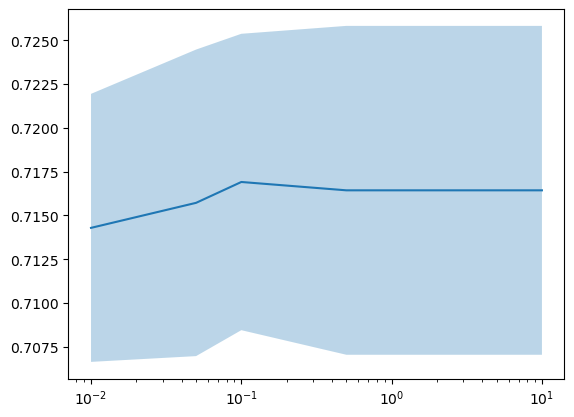

In [56]:
optimizer.fit(X_train_real_zeros, y_train)

plot_scores(optimizer)

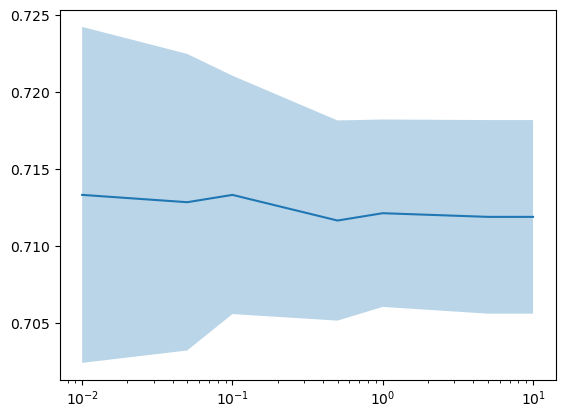

In [57]:
optimizer.fit(X_train_real_means, y_train)

plot_scores(optimizer)

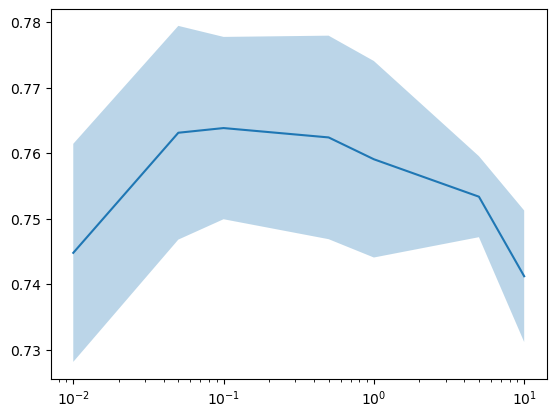

In [59]:
optimizer.fit(X_train_cat_oh, y_train)

plot_scores(optimizer)

## Задание 1.5. Масштабирование вещественных признаков.

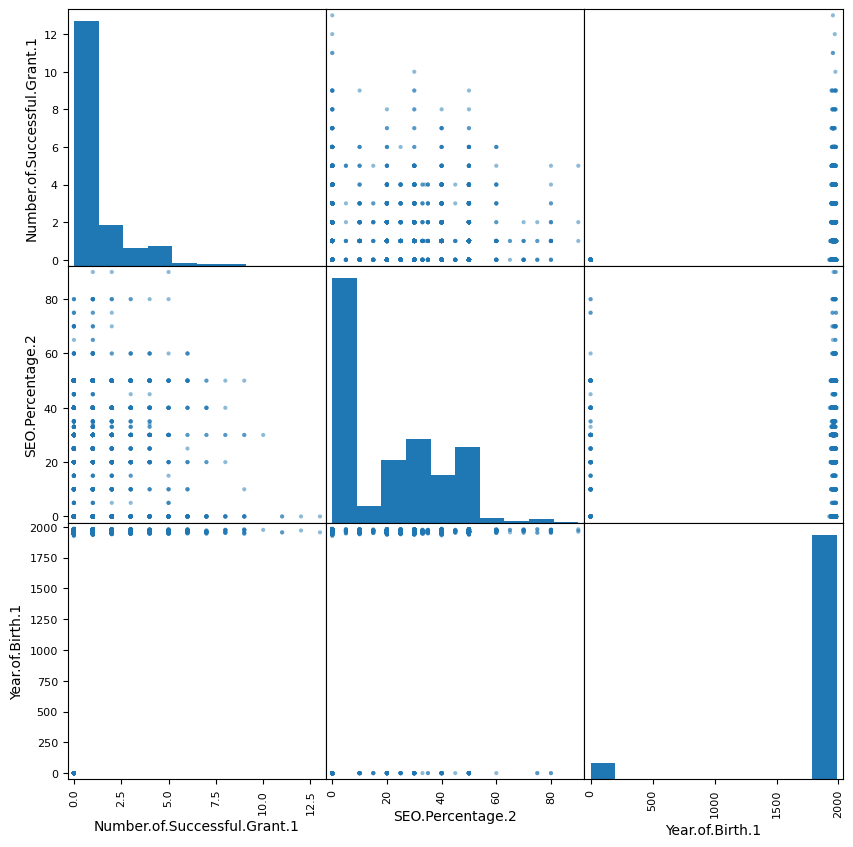

In [63]:
data_numeric = pd.DataFrame(X_train_real_zeros, columns=numeric_cols)

list_cols = [
    "Number.of.Successful.Grant.1",
    "SEO.Percentage.2",
    "Year.of.Birth.1"
]

scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))

plt.show()

In [66]:
X_train_real_scaled = StandardScaler().fit_transform(X_train_real_zeros)
X_test_real_scaled = StandardScaler().fit_transform(X_test_real_zeros)

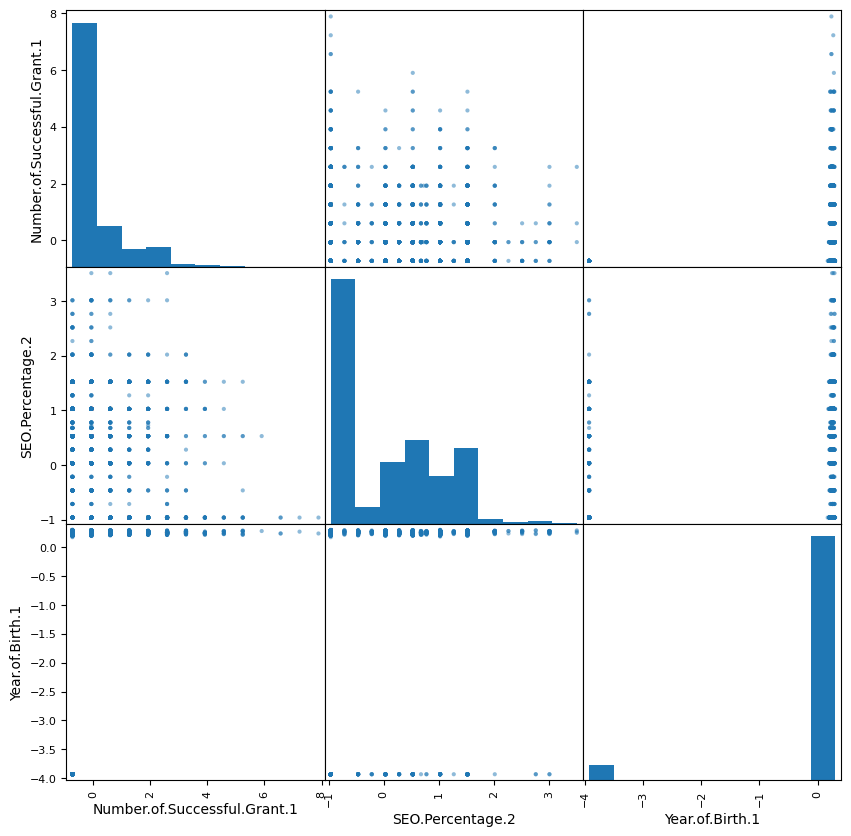

In [67]:
data_numeric_scaled = pd.DataFrame(X_train_real_scaled, columns=numeric_cols)

list_cols = [
    "Number.of.Successful.Grant.1",
    "SEO.Percentage.2",
    "Year.of.Birth.1"
]

scatter_matrix(data_numeric_scaled[list_cols], alpha=0.5, figsize=(10, 10))

plt.show()

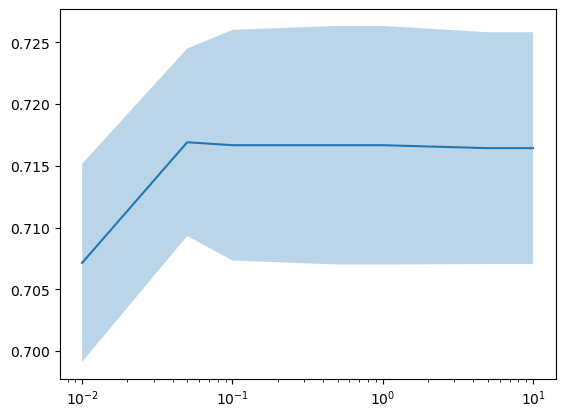

In [68]:
X_train_real_scaled = StandardScaler().fit_transform(X_train_real_zeros)
X_test_real_scaled = StandardScaler().fit_transform(X_test_real_zeros)

optimizer.fit(X_train_real_scaled, y_train)

plot_scores(optimizer)

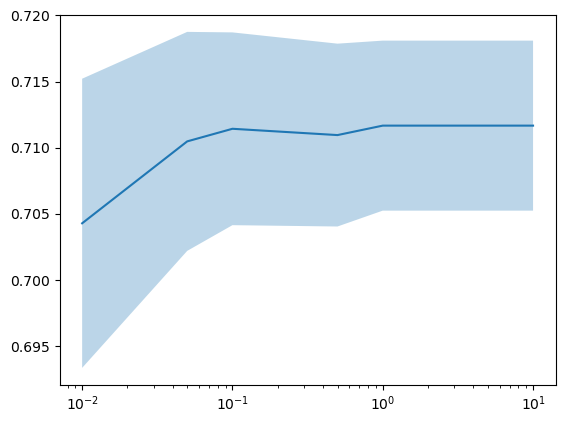

In [69]:
X_train_real_scaled = StandardScaler().fit_transform(X_train_real_means)
X_test_real_scaled = StandardScaler().fit_transform(X_test_real_means)

optimizer.fit(X_train_real_scaled, y_train)

plot_scores(optimizer)

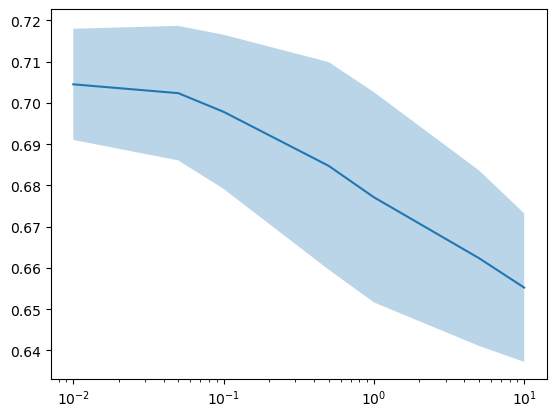

In [70]:
# Эту байду не запускать! Будет работать полгода

X_train_real_scaled = StandardScaler().fit_transform(X_train_cat_oh)
X_test_real_scaled = StandardScaler().fit_transform(X_test_cat_oh)

optimizer.fit(X_train_real_scaled, y_train)

plot_scores(optimizer)

In [71]:
X_train_real_zeros.shape

(1800, 13)

In [72]:
X_train_real_means.shape

(1800, 13)

In [75]:
X_train_cat_oh.shape

(4200, 5593)

In [76]:
X_cat.shape

(6000, 25)